# Cortex Data Analysis

In [1]:
import scvi
import scanpy as sc
import anndata
import numpy

Global seed set to 0


In [2]:
adata = scvi.data.cortex()


INFO     File /home/server_crash_/Single-Cell-Analysis/datasets/data/expression.bin already  
         downloaded                                                                          
INFO     Loading Cortex data from                                                            
         /home/server_crash_/Single-Cell-Analysis/datasets/data/expression.bin               
INFO     Finished loading Cortex data                                                        
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     Using labels from adata.obs["labels"]                                               
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 3005 cells, 19972 vars, 1 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                             

/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
adata.obs

,labels,precise_labels,cell_type,_scvi_batch,_scvi_labels
0,2,1,interneurons,0,2
1,2,1,interneurons,0,2
2,2,1,interneurons,0,2
3,2,1,interneurons,0,2
4,2,1,interneurons,0,2
...,...,...,...,...,...
3000,1,9,endothelial-mural,0,1
3001,1,9,endothelial-mural,0,1
3002,1,9,endothelial-mural,0,1
3003,1,9,endothelial-mural,0,1


In [4]:
adata.var

""
Tspan12
Tshz1
Fnbp1l
Adamts15
Cldn12
...
Gm20738_loc4
Gm20738_loc6
Gm21943_loc1
Gm21943_loc3


In [5]:
adata.obs

,labels,precise_labels,cell_type,_scvi_batch,_scvi_labels
0,2,1,interneurons,0,2
1,2,1,interneurons,0,2
2,2,1,interneurons,0,2
3,2,1,interneurons,0,2
4,2,1,interneurons,0,2
...,...,...,...,...,...
3000,1,9,endothelial-mural,0,1
3001,1,9,endothelial-mural,0,1
3002,1,9,endothelial-mural,0,1
3003,1,9,endothelial-mural,0,1


### Quality Control

In [6]:
adata.var['mt']=adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'],percent_top=[],log1p=False,inplace=True)

In [7]:
adata.obs

,labels,precise_labels,cell_type,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
0,2,1,interneurons,0,2,4848,21580.0,0.0,0.0
1,2,1,interneurons,0,2,4685,21748.0,0.0,0.0
2,2,1,interneurons,0,2,6028,31642.0,0.0,0.0
3,2,1,interneurons,0,2,5824,32914.0,0.0,0.0
4,2,1,interneurons,0,2,4701,21530.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3000,1,9,endothelial-mural,0,1,2221,4585.0,0.0,0.0
3001,1,9,endothelial-mural,0,1,1428,2559.0,0.0,0.0
3002,1,9,endothelial-mural,0,1,1977,4015.0,0.0,0.0
3003,1,9,endothelial-mural,0,1,1493,2896.0,0.0,0.0


/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'precise_labels' as categorical
/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical


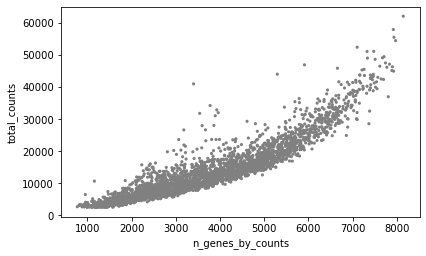

In [8]:
sc.pl.scatter(adata,"n_genes_by_counts","total_counts")

In [9]:
sc.pp.filter_cells(adata,max_genes=7500, inplace=True, copy=False)

In [10]:
sc.pp.filter_cells(adata,max_counts=45000, inplace=True, copy=False)

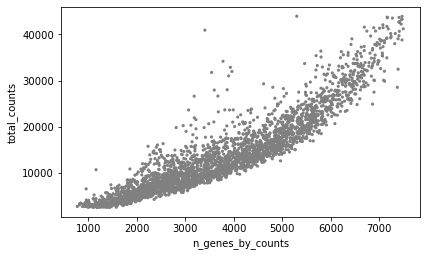

In [11]:
sc.pl.scatter(adata,"n_genes_by_counts","total_counts")

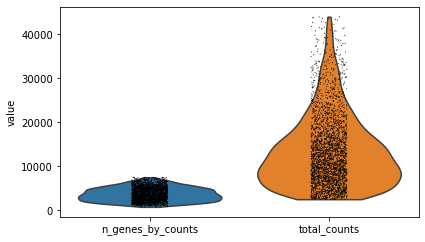

In [12]:
sc.pl.violin(adata,["n_genes_by_counts","total_counts"])

## Normalization

In [13]:
adata.layers["counts"]=adata.X.copy()
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)
adata.raw=adata
# a=1

In [14]:
sc.pp.highly_variable_genes(adata,n_top_genes=3500,layer="counts",flavor="seurat_v3")

In [15]:
adata=adata[:,adata.var.highly_variable].copy()

In [16]:
sc.pp.pca(adata)

In [17]:
sc.pp.neighbors(adata,n_neighbors=50,metric='euclidean')
sc.tl.umap(adata)

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [19]:
X_pca = adata.obsm['X_pca'] 

/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans7' as categorical


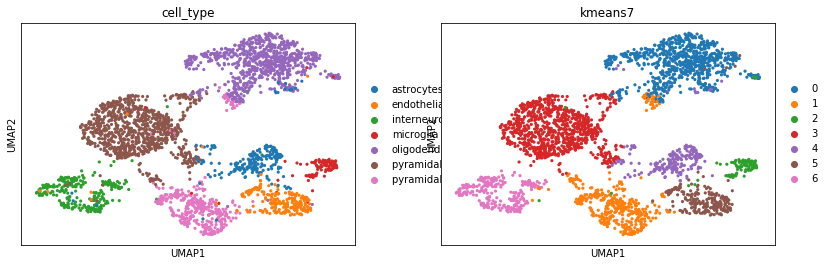

In [20]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_pca) 
adata.obs['kmeans7'] = kmeans.labels_.astype(str)
sc.pl.umap(adata,color=["cell_type",'kmeans7'])

In [21]:
adata.obs

,labels,precise_labels,cell_type,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,n_counts,kmeans7
0,2,1,interneurons,0,2,4848,21580.0,0.0,0.0,4848,21580.0,6
1,2,1,interneurons,0,2,4685,21748.0,0.0,0.0,4685,21748.0,6
2,2,1,interneurons,0,2,6028,31642.0,0.0,0.0,6028,31642.0,6
3,2,1,interneurons,0,2,5824,32914.0,0.0,0.0,5824,32914.0,6
4,2,1,interneurons,0,2,4701,21530.0,0.0,0.0,4701,21530.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,1,9,endothelial-mural,0,1,2221,4585.0,0.0,0.0,2221,4585.0,5
3001,1,9,endothelial-mural,0,1,1428,2559.0,0.0,0.0,1428,2559.0,5
3002,1,9,endothelial-mural,0,1,1977,4015.0,0.0,0.0,1977,4015.0,1
3003,1,9,endothelial-mural,0,1,1493,2896.0,0.0,0.0,1493,2896.0,4


In [22]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

### Calculate NMI

In [23]:
print("NMI is: ",normalized_mutual_info_score(adata.obs["cell_type"],adata.obs['kmeans7']))
print("ARI is: ",adjusted_rand_score(adata.obs["cell_type"],adata.obs['kmeans7']))
print("FM is: ",fowlkes_mallows_score(adata.obs["cell_type"],adata.obs['kmeans7']))

NMI is:  0.8580665184287175
ARI is:  0.9113965159432981
FM is:  0.9300420462049871
